<center>
    <b><h1> Couserwork Assignment: Text Classification</h1></b>
</center>

<center>
    <h3>University of London</h3>
</center>

<center>
    <h3>BSc in Computer Science</h3>
</center>

<center>
    <h3>Natural Language Processing</h3>
</center>

<div style="page-break-after: always;"></div>

<h1> Table of Content</h1>

<style>
ul {
    font-size: 20px;
}

ul ul {
    font-size: 15px;
}
</style>

<ul>
    <li>
        <a href="#intro">1. Introduction</a>
        <ul>
            <li><a href="#1.1">1.1 Problem Area</a></li>
            <li><a href="#1.2">1.2 Objectives</a></li>
        </ul>
    </li>
    <li>
        <a href="#implementation">2. Implementation</a>
        <ul>
            <li><a href="#2.1">2.1 Data Extraction and Cleaning</a></li>
            <li><a href="#2.2">2.2 Prelimary Data Exploration and Data Cleaning</a></li>
        </ul>
    </li>
    <li>
        <a href="#section3">Section 3</a>
        <ul>
            <li><a href="#subsection3.1">Subsection 3.1</a></li>
            <li><a href="#subsection3.2">Subsection 3.2</a></li>
        </ul>
    </li>
</ul>


<div style="page-break-after: always;"></div>

<h2 id="intro">1. Introduction</h2>
<h3 id="1.1">1.1 Problem area</h3>

<h2 id="implementation">2. Implementation</h2>
<h3 id="2.1">2.1 Data extraction</h3>

Data will be extracted and stored locally. To extract the data required for the Natural Language Processing, some libraries were imported.

In [1]:
# Import library needed for data analysis

# os is used for handling the system
import os

# random for randomly selecting the data
import random

# pandas for storing and handling the data in data frame
import pandas as pd

# matplotlib for visualising the data
import matplotlib.pyplot as plt

# NLTK for natural language processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

The location of the data file is specified to extract the data

In [2]:
# Path to the folders
pos_folder = r'C:\Users\xjie\Documents\SIM\Y3S2\nlp\aclImdb\train\pos'
neg_folder = r'C:\Users\xjie\Documents\SIM\Y3S2\nlp\aclImdb\train\neg'

<b>Format of data:</b> As the data obtained is in the form of text document stored in positive and negative sentiment folder with each individual file name as the rating and the ID, a file counter is needed to check for the length of the data

In [3]:
# Helper functions;

# Count the number of files in the data folder
def count_files(folder_path):
    if not os.path.isdir(folder_path):
        print(f"Error: {folder_path} is not a valid directory.")
        return

    file_count = 0

    for _, _, files in os.walk(folder_path):
        file_count += len(files)

    return file_count

Using the function as define above, the number of the files in both positive and negative folder are obtained: 

In [4]:
# Positive data file avaliable
file_count = count_files(pos_folder)
print(f"The number of files in positive data folder is: {file_count}")

The number of files in positive data folder is: 12500


In [5]:
# Negative data file avaliable 
file_count = count_files(neg_folder)
print(f"The number of files in nagtive data folder is: {file_count}")

The number of files in nagtive data folder is: 12500


As this training data set is <b>too big</b> for the computer, only <b>5000 data</b> from positive and negative folder respectively will be selected to make the program runs faster. Then these data will be further seperated into test and training sets.

Some helper functions are defined to extract the information and data from the data folder:

In [6]:
# Helper functions

# Function to extract unique ID and rating from file name
def extract_info(file_name):
    id_rating = file_name.split('.')[0]
    unique_id, rating = id_rating.split('_')
    return int(unique_id), int(rating)

# Function to extract the data from the file based on the aclImdb data structure
def extract_files(folder, num_files, sentiment):
    files = random.sample(os.listdir(folder), num_files)
    data = pd.DataFrame(columns=['Sentiment', 'Unique ID', 'Rating', 'Content'])
    
    for file_name in files:
        file_path = os.path.join(folder, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read() # read content for the review
        unique_id, rating = extract_info(file_name)  # get ID and rating from file name
        file_data = pd.DataFrame({'Sentiment': [sentiment], 'Unique ID': [unique_id], 'Rating': [rating], 'Content': [content]})
        data = pd.concat([data, file_data], ignore_index=True)
    
    return data

In [7]:
# Extracting data
pos_data = extract_files(pos_folder, 5000, 'pos')
neg_data = extract_files(neg_folder, 5000, 'neg')

# Print the resulting DataFrame
raw_data = pd.concat([pos_data, neg_data], ignore_index=True)

# Display the start of the data
raw_data.head()

Sentiment Unique ID Rating   
0       pos      8671      7  \
1       pos      5214      7   
2       pos      8442      9   
3       pos        43     10   
4       pos       274      7   

                                             Content  
0  Armageddon PPV<br /><br />The last PPV of 2006...  
1  Hong Kong directors crossing over to Hollywood...  
2  The movie was excellent, save for some of the ...  
3  I liked this movie a lot. It really intrigued ...  
4  I watch most movies that Nick Mancuso is in be...

<br>

<h3 id="2.2">2.2 Prelimary Data Exploration and Data Cleaning</h3>

In [8]:
# Examining the data
raw_data.describe()

Sentiment  Unique ID  Rating   
count      10000      10000   10000  \
unique         2       8040       8   
top          pos      11266       1   
freq        5000          2    2064   

                                                  Content  
count                                               10000  
unique                                               9987  
top     Dumb is as dumb does, in this thoroughly unint...  
freq                                                    2

It was noted that both Unique ID and Content has duplicated values after the extraction as the frequency of the data is not 1. 

However, it is <b>not ideal</b> for the model to take in repeated reading in the content field as it does not add any more knowlegde to the model. Moreover, the original unique ID also do not provide much information after combining the data from both positive sentiment and negative sentiment.

Thus, an algorithm will be implemented to check for these values and handle them.

<b>For duplicates in Unique ID</b>, as a <b>new ID will be assigned</b> as the index for the data frame, there is <b>no need</b> for the Unique ID from positive sentiment and negative sentiment folder. Thus, the <b>unique ID column will be dropped</b>. 

<b>For duplicates in content</b>, it will first find the duplicates, then remove the <b>first instance</b> of the duplicates. To ensure the overall dataset remain balanced, it will perform the random selection of data from the original data file again. These two functions will be <b>called recursively</b> until there is <b>no repetition</b> in the dataframe. The cleaned data will be saved in a new data frame.

In [9]:
# Remove unique ID column from the data
org_ID_removed_data = raw_data.drop("Unique ID", axis=1)

In [10]:
# Helper function

# Check for repetetion of data
def find_duplicates(dataframe, column):
    duplicates = dataframe[dataframe[column].duplicated(keep=False)]
    duplicates_sorted = duplicates.sort_values(by=column)

    if duplicates_sorted.empty:
        print("No repeated data entry found.")
    else:
        print("Repeated data entry/entries found in "+str(column))
        duplicates_pairs = duplicates_sorted.groupby(column).apply(lambda x: x.reset_index(drop=True))
        duplicates_pairs.reset_index(drop=True, inplace=True)
        return duplicates_pairs
    
# replace duplicates with other values
def get_balance_data_with_duplicates(duplicate_content, original_data, pos_folder, neg_folder):
    # Remove the first occurrence of unique items in the duplicated content
    data_to_remove = duplicate_content.drop_duplicates(subset='Content', keep='first')
    org_ID_removed_data = original_data.drop_duplicates(subset='Content', keep='first')

    # Count the number of pos and neg entries in 'data_to_remove'
    pos_count = data_to_remove[data_to_remove['Sentiment'] == 'pos'].shape[0]
    neg_count = data_to_remove[data_to_remove['Sentiment'] == 'neg'].shape[0]

    # Add the removed duplicates such that the data is balanced
    added_pos_data = extract_files(pos_folder, pos_count, 'pos')
    added_neg_data = extract_files(neg_folder, neg_count, 'neg')

    # Remove the 'Unique ID' column from added data
    added_pos_data.drop("Unique ID", axis=1, inplace=True)
    added_neg_data.drop("Unique ID", axis=1, inplace=True)

    added_data = pd.concat([added_pos_data, added_neg_data], ignore_index=True)
    balanced_data = pd.concat([org_ID_removed_data, added_data], ignore_index=True)

    return balanced_data

# recursively call the previouse two function untill data is balanced and no repetition
def recursive_data_balancing(dataframe, column, pos_folder, neg_folder):
    duplicates = find_duplicates(dataframe, column)

    if duplicates is None:
        print("No more duplicates found.")
        return dataframe

    # Call get_balance_data_with_duplicates with the duplicate content
    balanced_data = get_balance_data_with_duplicates(duplicates, dataframe, pos_folder, neg_folder)

    # Recursively check for duplicates
    print("Recursive call to balance the data.")
    return recursive_data_balancing(balanced_data, column, pos_folder, neg_folder)

In [11]:
balanced_data = recursive_data_balancing(org_ID_removed_data, 'Content', pos_folder, neg_folder)

Repeated data entry/entries found in Content
Recursive call to balance the data.
Repeated data entry/entries found in Content
Recursive call to balance the data.
Repeated data entry/entries found in Content
Recursive call to balance the data.
Repeated data entry/entries found in Content
Recursive call to balance the data.
Repeated data entry/entries found in Content
Recursive call to balance the data.
Repeated data entry/entries found in Content
Recursive call to balance the data.
No repeated data entry found.
No more duplicates found.


Besides the ensure balancing and no repetition of data, some other checks were also performed on the dataset

In [12]:
# checking the overall information
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  10000 non-null  object
 1   Rating     10000 non-null  object
 2   Content    10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [13]:
# check for null data
balanced_data.isnull().sum()

Sentiment    0
Rating       0
Content      0
dtype: int64

In [14]:
# double checking for unique data
balanced_data.nunique()

Sentiment        2
Rating           8
Content      10000
dtype: int64

In [15]:
# double checking the total number of data entries
print("Number of entries in 'Sentiment' column:", balanced_data['Sentiment'].shape[0])
print("Number of entries in 'Rating' column:", balanced_data['Rating'].shape[0])
print("Number of entries in 'Content' column:", balanced_data['Content'].shape[0])

Number of entries in 'Sentiment' column: 10000
Number of entries in 'Rating' column: 10000
Number of entries in 'Content' column: 10000


In [16]:
balanced_data['Sentiment'].value_counts()

Sentiment
pos    5000
neg    5000
Name: count, dtype: int64

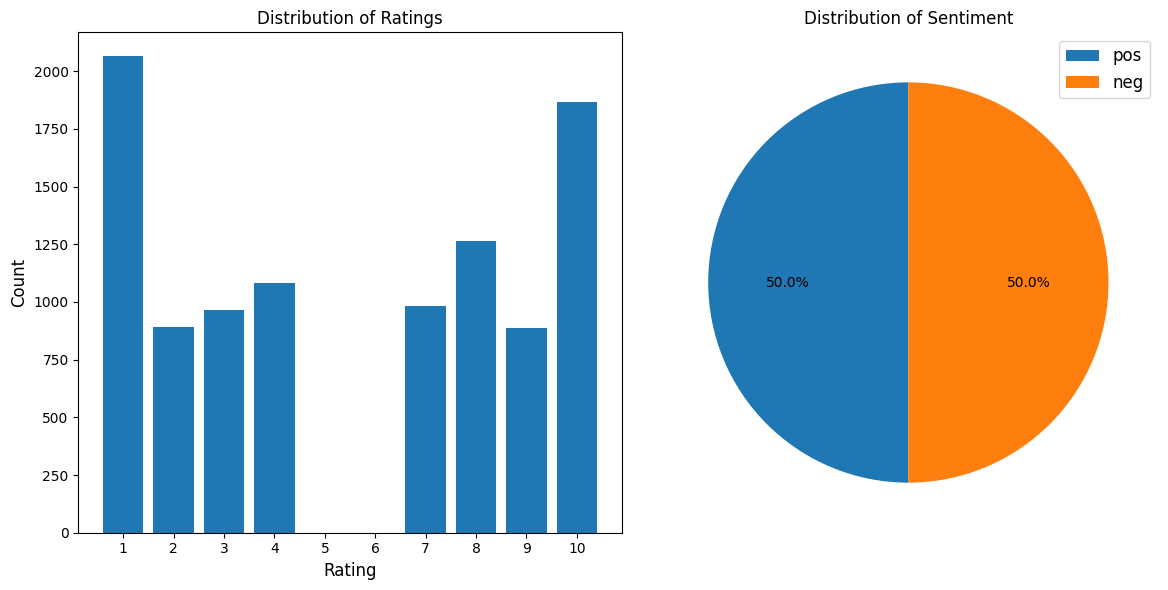

In [17]:
# Plot a grpah to show the distribition of ratings
import matplotlib.pyplot as plt

# Distribution of Ratings
rating_counts = balanced_data['Rating'].value_counts().sort_index()

# Distribution of Sentiment
sentiment_counts = balanced_data['Sentiment'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Distribution of Ratings
ax1.set_xticks(range(1, 11))
ax1.set_xticklabels(range(1, 11))
ax1.bar(rating_counts.index, rating_counts.values)
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Count',  fontsize=12)
ax1.set_title('Distribution of Ratings')

# Plot Distribution of Sentiment
ax2.pie(sentiment_counts.values, 
        labels=None, 
        autopct='%1.1f%%', 
        startangle=90) # no labels, set as 1 decimal place, title the angle by 90 degree
ax2.set_title('Distribution of Sentiment')
ax2.legend(sentiment_counts.index, loc="best", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

It can be seen that this dataframe contains 10000 with a <b>balanced distribution</b> of positive and negative sentiment data. The <b>most common rating</b> is 1 followed by 10. Both of them are the most frequent term in their sentiment respectively.

There is also <b>no null data</b> in all three columns.

<h4>Tokenization and lemmatization</h4>

In [18]:
# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [19]:
# Function to preprocess the text
def text_processing_pipeline(text):
    # Change all text to lower case
    text = text.lower()

    # Remove the punctuations from the text
    text = re.sub(r'[^a-z0-9]', ' ', text)

    # Tokenization
    words = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Stop Words removal, result stored in words
    stop_words = set(stopwords.words('english'))
    words = (word for word in words if word not in stop_words)

    # Combine the words back
    text = ' '.join(word for word in words)

    
    # Removing spaces before and after the text
    text = text.strip()
    
    # Change the spaces with length more than 1 to 1
    text = re.sub(r'\s+', ' ', text)

    return text

In [20]:
# make a copy of the balanced data
processed_data = balanced_data.copy()
# iteratively run the processing pipeline on every entry of content
for i in range(len(balanced_data)):
    processed_data.loc[i, 'Content'] = text_processing_pipeline(processed_data.loc[i, 'Content'])
processed_data

Sentiment Rating                                            Content
0          pos      7  armageddon ppv br br last ppv 2006 br br smack...
1          pos      7  hong kong director crossing hollywood make mov...
2          pos      9  movie wa excellent save scene esposito enjoyed...
3          pos     10  liked movie lot really intrigued deanna alicia...
4          pos      7  watch movie nick mancuso frankly love guy even...
...        ...    ...                                                ...
9995       neg      3  fantastic premise movie berlin airlift tragedy...
9996       pos     10  stunning absolutely stunning movie two kid fat...
9997       pos      8  film like wallace gromit chicken run belt good...
9998       pos      9  1928 many way lost year motion picture finest ...
9999       neg      4  mark pirro deathrow gameshow 1987 black comedy...

[10000 rows x 3 columns]

the following algorithm is used to check if the text has all being processed.

In [25]:
# Check the success of text processing
success_count = 0
for original_text, processed_text in zip(balanced_data['Content'], processed_data['Content']):

    if original_text == processed_text:
        print("Text processing failed")
    else:
        success_count +=1
if success_count == len(processed_data['Content']):
    print("Text processing success")

Text processing success
